In [138]:
import matplotlib.pyplot as plt
import numpy as np

import evince as ev
import braketlab as bk

from ast import literal_eval 


from scipy.interpolate import interp1d

In [306]:
n_atoms = 5

z = np.zeros((n_atoms,4), dtype = float)
#z[0,:] = 1




s = """C      0.00000    0.00000    0.00000
H      0.00000    0.00000    1.08900
H      1.02672    0.00000   -0.36300
H     -0.51336   -0.88916   -0.36300
H     -0.51336    0.88916   -0.36300"""


th = -.5
ct, st = np.cos(th), np.sin(th)
rot = np.array([[ct,st,0],[-st,ct,0], [0,0,1]])

z[:, 1:] = np.array([[literal_eval(i) for i in m.split()[1:]] for m in s.split("\n")]).dot(rot)

print(z)

orb_p = bk.basisbank.get_gto(1,1,0,position = z[0,1:])
for i in range(1, n_atoms):
    orb_p += 1*bk.basisbank.get_gto(1,1,0,position = z[i,1:])
    
    


[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.089     ]
 [ 0.          0.90103157 -0.49223579 -0.363     ]
 [ 0.         -0.8768018  -0.53419342 -0.363     ]
 [ 0.         -0.02422977  1.02642921 -0.363     ]]


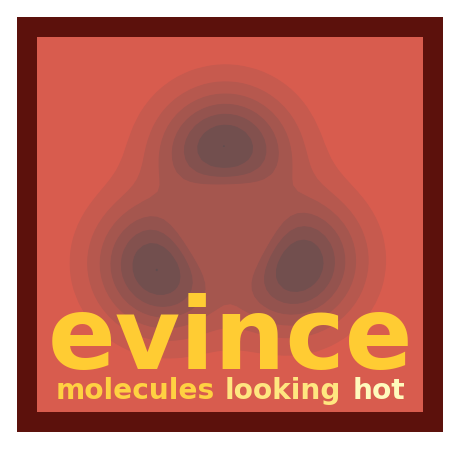

In [319]:
np.random.seed(15)
Nc = 3
Ncolors = 10
C = interp1d(np.linspace(0,1,Nc), np.random.uniform(0,1,(3, Nc)))

C3 = interp1d([0,1], np.array([[1,.8,.2],[1,1,.8]]).T)

C2 = interp1d(np.linspace(0,1,Nc), np.random.uniform(0,1,(3, Nc)))
colors = C(np.linspace(0,1,Ncolors)).T

plt.figure(figsize = (8,8))
plt.plot([-1,1,1,-1,-1], [-1,-1,1,1,-1], "-", color = .5*C(0)**2, linewidth = 20, solid_joinstyle="miter")
plt.text(0,-.73,"evince", color = np.array([1,.8,.2]), fontsize =100, ha = "center", fontname ="Sinhala",fontweight='bold', zorder = 10)
#plt.text(0,-.73,"Evince", color = colors[2]**.5, fontsize =100, ha = "center", fontname ="Sinhala",fontweight='bold', zorder = 9)

plt.text(-.47,-.88,"molecules", color = C3(.1), fontsize =28, ha = "center", fontname ="Sinhala",fontweight='bold', zorder = 10)
plt.text(.26,-.88,"looking", color = C3(.5), fontsize =28, ha = "center", fontname ="Sinhala",fontweight='bold', zorder = 10)
plt.text(.73,-.88,"hot", color =C3(.9), fontsize =28, ha = "center", fontname ="Sinhala",fontweight='bold', zorder = 10)



N = 20
for i in range(N):
    X = ev.processing.extract_plane_contour(orb_p, isoval = .000001 + (i/N), c= 0)
    #print(X)
    try:
        for j in range(len(X)):
            x = .33*X[j][0]
            y = .33*X[j][1]
            x[x>1]=1
            x[x<-1]=-1
            y[y>1]=1
            y[y<-1]=-1
            
            
            #plt.plot(x,y, color = C3(0), zorder = 10, linewidth = 2, alpha = .1)
            plt.fill(x,y, color = C(i/N))
    except:
        pass

s = 1.1
plt.xlim(-s,s)
plt.ylim(-s,s)
plt.axis("off")

plt.savefig("evince_logo.png", dpi = 200, bbox_inches = "tight", transparent = True)
plt.show()



## import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [70]:
help(ev.processing.extract_plane_contour)

Help on function extract_plane_contour in module evince.processing:

extract_plane_contour(orb, a=0, b=0, c=0, dr=array([0, 0, 0]), isoval=0.1)
    Draw curves at isoscalars where the distribution (orb) intersects a plane.
        
    Plane is rotated aby the angles ```a```,```b```,```c``` (around the x-, y- and z-axis), 
    and then translated by the vector ```dr```.

